# First Machine Learning Project in Python Step-By-Step

This is a work-through tutorial for the beginners project in Machine Learning based on the [Python Step-by-Step](http://machinelearningmastery.com/machine-learning-in-python-step-by-step/) by Dr. Jason Brownlee of the Machine Learning Mastery website.

## Import Libraries

In [2]:
#Libraries for data analysis and visualisations
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#Machine Learning Algorithms
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load the Data

In [2]:
#Load the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [6]:
dataset.shape

(150, 5)

This iris dataset contains 150 samples with 5 distinct features.

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Notice each class has 50 instances, making up 33.3% of the dataset.

## Exploratory Data Analysis 

Let's explore the iris data through visualisations! First we explore the numerical feature of the dataset. We can create a boxplot for this.

### Univariate Plots

We look into the data for each feature seperately.

sepal-length       Axes(0.125,0.536818;0.352273x0.343182)
sepal-width     Axes(0.547727,0.536818;0.352273x0.343182)
petal-length          Axes(0.125,0.125;0.352273x0.343182)
petal-width        Axes(0.547727,0.125;0.352273x0.343182)
dtype: object

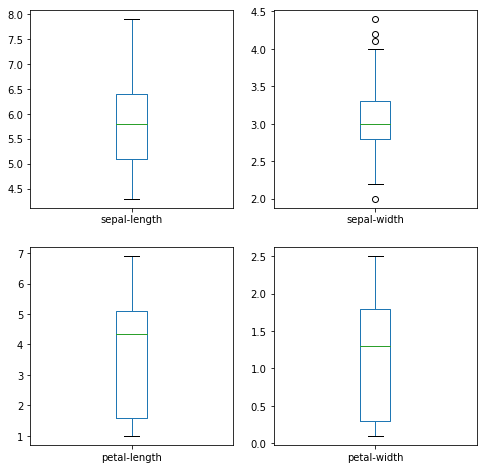

In [9]:
# box and whiskers plot

dataset.plot(kind='box',subplots=True,layout=(2,2),figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E218D03E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002E218C81BA8>]], dtype=object)

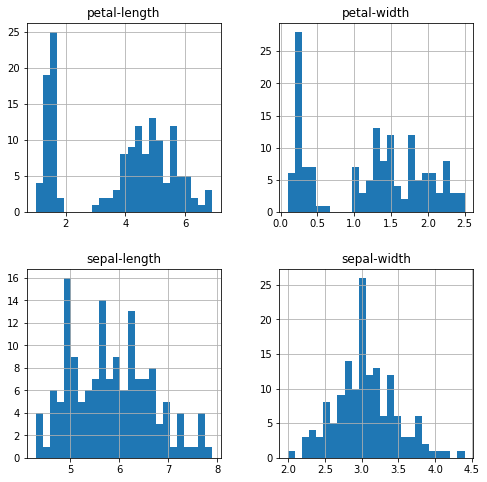

In [13]:
#histogram of features

dataset.hist(figsize=(8,8),bins=25)

2 of the features (sepal length and sepal width) are normally distributed. Notice for petal length and width shows two kinds of normal distributions: one for smaller petal lengths and widths and one for larger petal lengths and widths. Which class could they be?

### Multivariate Plots 

Let's examine the relationship between each of the features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E21AE96710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002E21B4B4550>]], dtype=object)

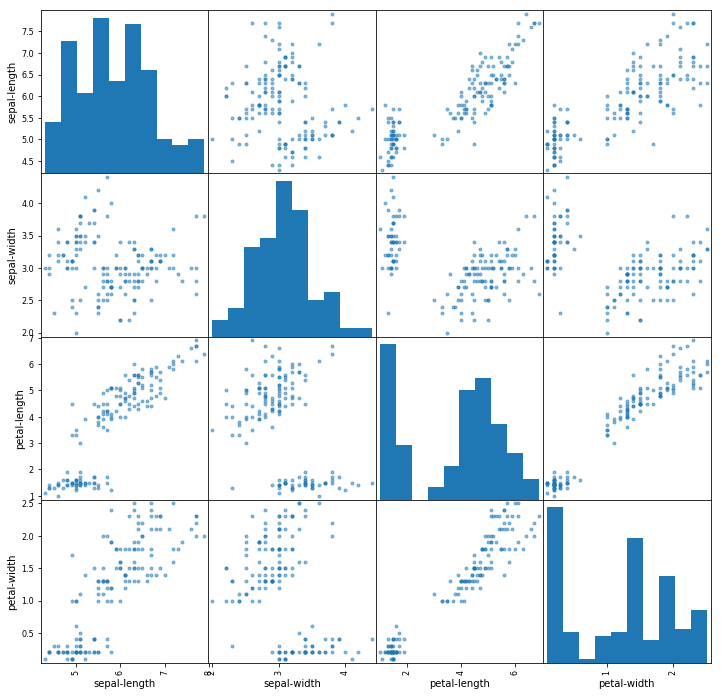

In [17]:
#scatter plot matrix

scatter_matrix(dataset,figsize=(12,12))

Notice for some of the scatterplots show a diagonal grouping for some of the paired features: this suggest a high correlation between the pairs. Also for some of these plots include a small grouping for smaller sepal/petal lengths and widths.

## Machine Learning Algorithms

We will be using the train test split method for training 80% of our model, and using the 20% of the dataset as our validation dataset.

In [14]:
# Train Test Split

array = dataset.values
X = array[:,0:4]  # Our features, or X= dataset.drop('class',axis=1)
y = array[:,4] #y = dataset['class']
validation_size = 0.20
seed =7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [15]:
#Test options and evaluation metrics

seed = 7
scoring = 'accuracy'

Let’s evaluate 6 different algorithms:

  Logistic Regression (LR),
  Linear Discriminant Analysis (LDA),
  K-Nearest Neighbors (KNN),
  Classification and Regression Trees (CART),
  Gaussian Naive Bayes (NB),
  Support Vector Machines (SVM).


In [17]:
# Spot Check Algorithms
#Appending the name and model into models list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed) #evaluate each model 10 times
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


From these results, Support Vector Machine (SVM) gave the biggest accuracy score, with Linear Regression the lowest accuracy, but all thesee models are above 95% percentage, which is pretty positive.

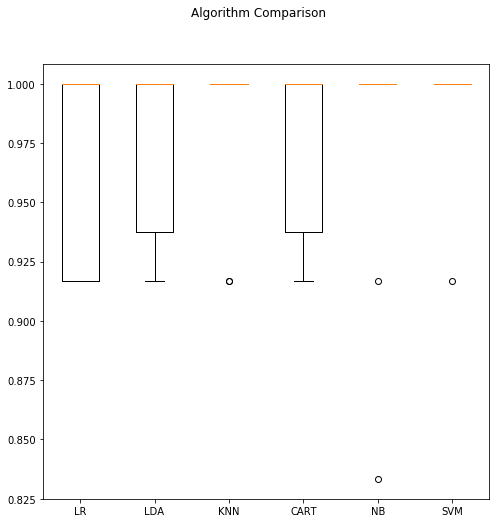

In [26]:
#Comparing the algorithms, box and whisker plots

fig = plt.figure(figsize=(8,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

The plot represents the spread, and the mean accuracy score for each of the models. Each algorithm was evaluated 10 times. Most of the models have samples giving 100% accuracy, you can see from the top of each box and whisker plot.

## Prediction and Evaluation

The SVM was the most accurate of our 6 algorithms. What we want to do now is to test the accuracy this model on our validation dataset.

Let's run the SVM model onto the validation dataset and evaluate the results with an accuracy score, a confusion matrix and a classification report.

In [28]:
#Making predictions on validation dataset

svm = SVC()
svm.fit(X_train,y_train)
pred = svm.predict(X_test)

print(accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

0.933333333333


[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



From this, the SVM model gives positive results, with and accuracy of 93.33%, the confusion matrix indicates only two errors were made, and the averages for the classification report at 93-4%.